# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
data = pd.read_csv("cancer_data.csv")

In [3]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                418 non-null    object 
 1   radius_mean              418 non-null    float64
 2   texture_mean             418 non-null    float64
 3   perimeter_mean           418 non-null    float64
 4   area_mean                418 non-null    float64
 5   smoothness_mean          418 non-null    float64
 6   compactness_mean         418 non-null    float64
 7   concavity_mean           418 non-null    float64
 8   concave points_mean      418 non-null    float64
 9   symmetry_mean            418 non-null    float64
 10  fractal_dimension_mean   418 non-null    float64
 11  radius_se                418 non-null    float64
 12  texture_se               418 non-null    float64
 13  perimeter_se             418 non-null    float64
 14  area_se                  4

In [6]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
data =data.drop(labels=["Unnamed: 32"],axis=1)

KeyError: "['Unnamed: 32'] not found in axis"

# Replacing M with 1 and B with 0

In [8]:
data["diagnosis"] = data["diagnosis"].replace("M",1)

In [9]:
data["diagnosis"] = data["diagnosis"].replace("B",0)

In [10]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.373206,14.029136,19.307344,91.395215,644.923923,0.097230,0.107102,0.090986,0.049729,0.181931,...,16.162411,25.737871,106.670766,867.028708,0.133396,0.261515,0.280694,0.116240,0.290912,0.085006
std,0.484236,3.489955,4.162598,24.100342,344.902611,0.014459,0.054095,0.081030,0.039182,0.027862,...,4.750899,5.890948,33.195639,556.253924,0.023084,0.163281,0.213652,0.065909,0.063789,0.018941
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.682500,16.330000,75.262500,419.925000,0.086820,0.066805,0.031105,0.020925,0.162250,...,13.050000,21.392500,84.492500,515.975000,0.117275,0.156650,0.124825,0.066720,0.248325,0.072285
50%,0.000000,13.355000,18.900000,86.260000,548.700000,0.097120,0.095275,0.062650,0.033420,0.179600,...,15.010000,25.515000,97.620000,688.750000,0.131950,0.216700,0.238900,0.101100,0.280600,0.080285
75%,1.000000,15.650000,21.817500,102.775000,756.175000,0.106475,0.131225,0.132050,0.074112,0.196600,...,18.197500,29.927500,123.500000,1021.000000,0.147000,0.342575,0.382400,0.161375,0.319375,0.092677
max,1.000000,27.420000,30.720000,186.900000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,42.790000,251.200000,4254.000000,0.218400,1.058000,1.252000,0.291000,0.663800,0.207500


# As data is clean lets analyze it

# lets check the ditribution of data

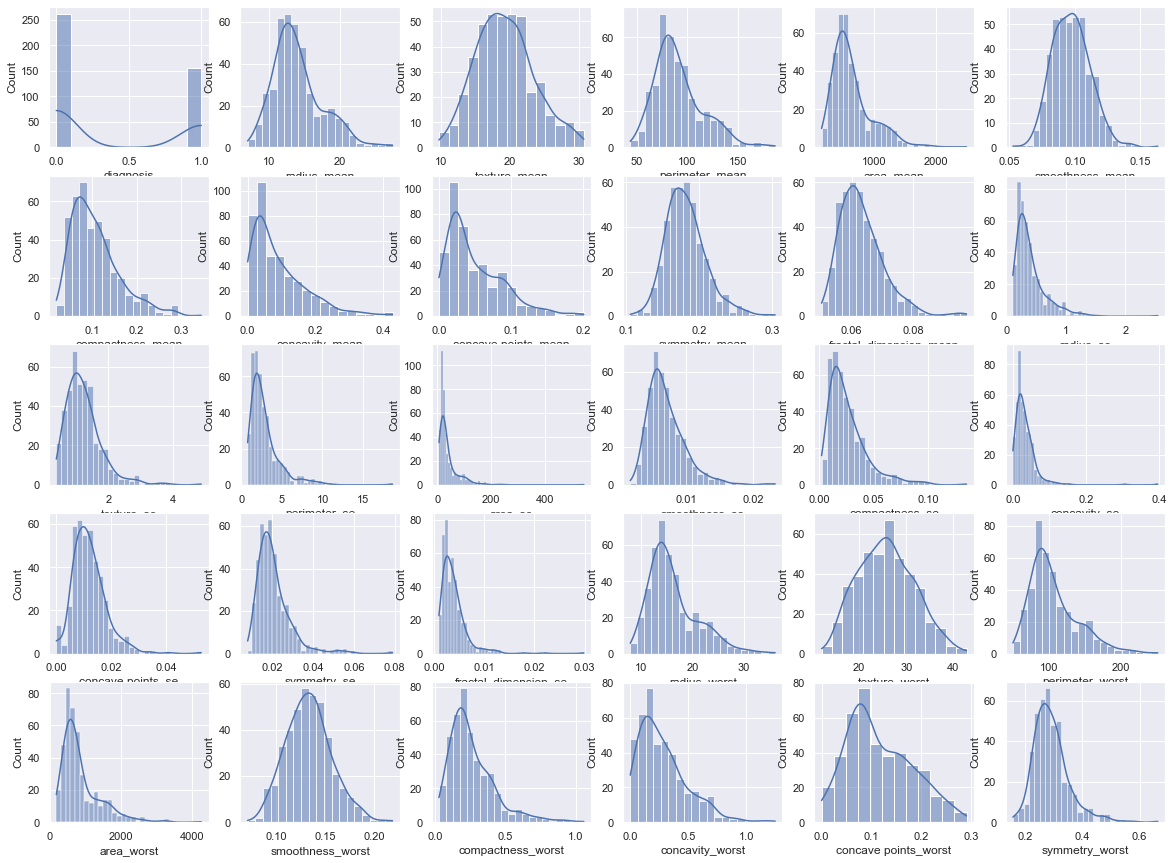

In [11]:
plt.figure(figsize = (20, 15))
sns.set(style="darkgrid")
plotnumber = 1

for column in data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
plt.show()

# checking for outliers

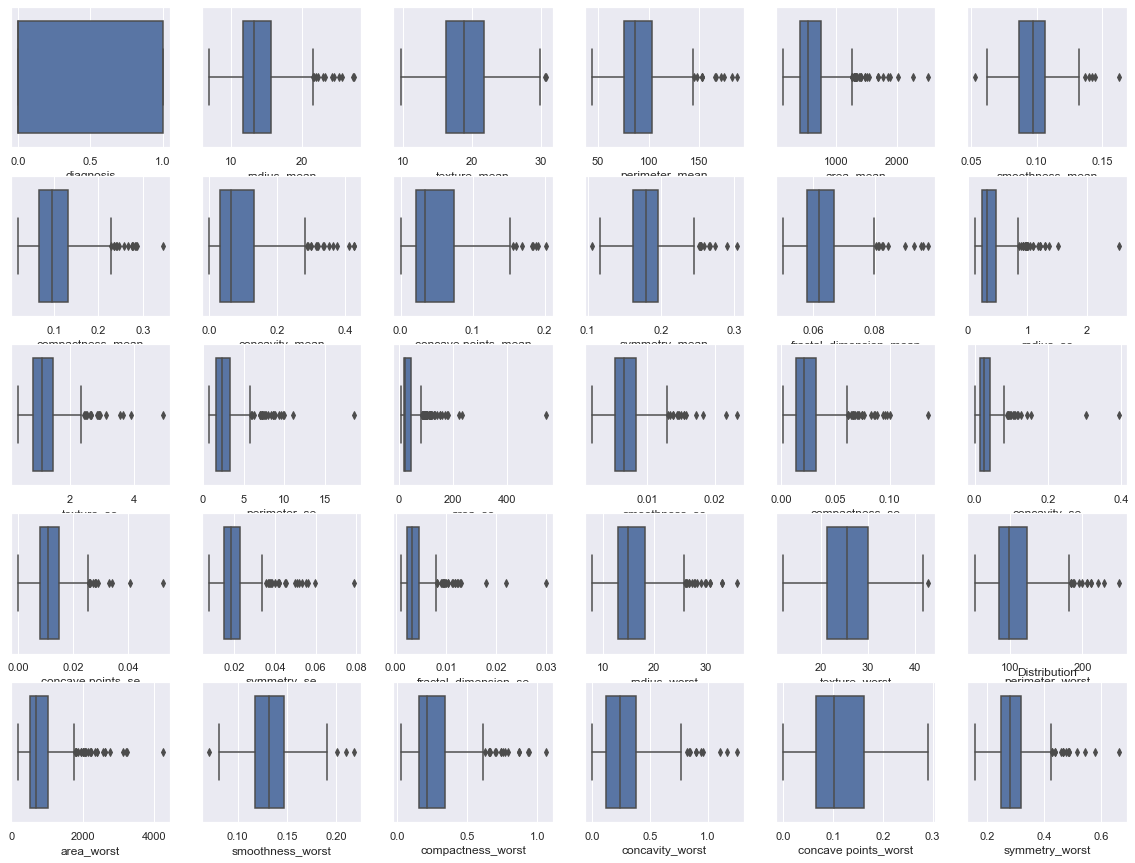

In [12]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column)
       
    plotnumber += 1
plt.title("Distribution")
plt.show()

<AxesSubplot:>

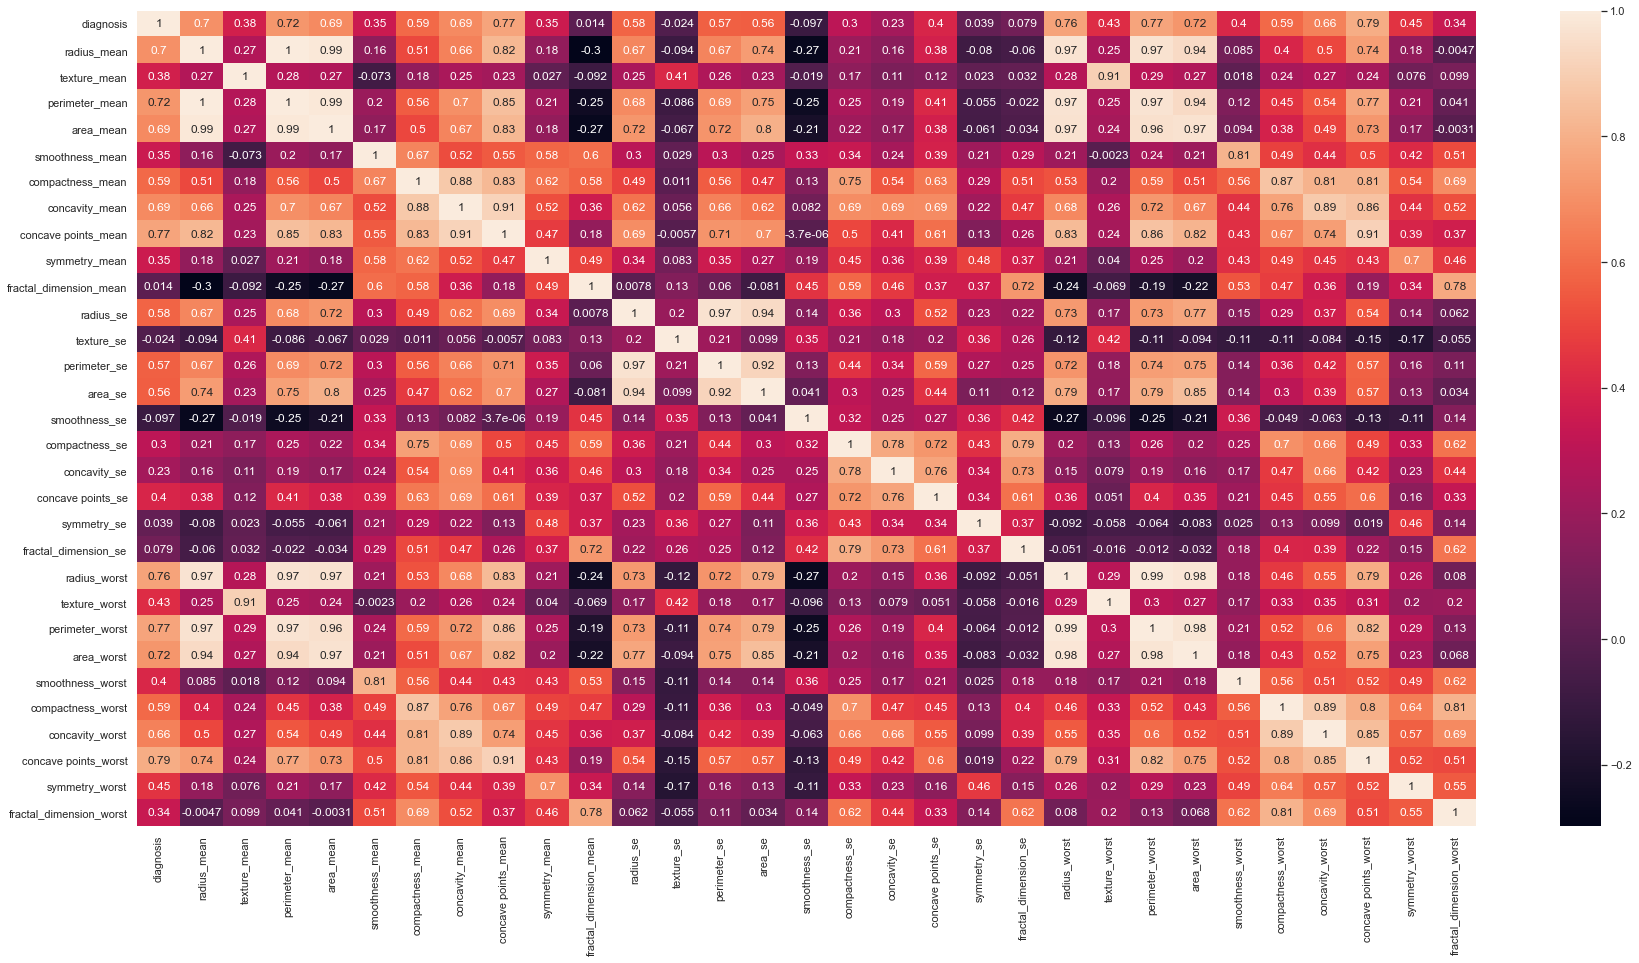

In [13]:
plt.figure(figsize = (30, 15))
sns.heatmap(data.corr(),annot=True)

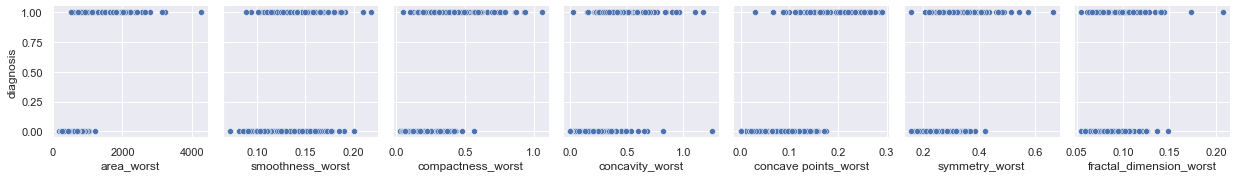

In [14]:
sns.pairplot(data,
             x_vars=[
                          'area_worst',
                     'smoothness_worst',
                  'compactness_worst',
                     'concavity_worst',
                     'concave points_worst',
                        'symmetry_worst',
                      'fractal_dimension_worst'],
             y_vars=["diagnosis"])

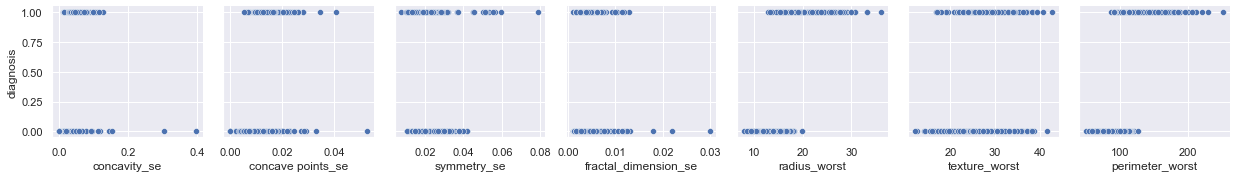

In [15]:
sns.pairplot(data,
             x_vars=[  'concavity_se', 
                     'concave points_se',
                     'symmetry_se',
                     'fractal_dimension_se',
                     'radius_worst', 
                     'texture_worst',
                  'perimeter_worst'],
             y_vars=["diagnosis"])

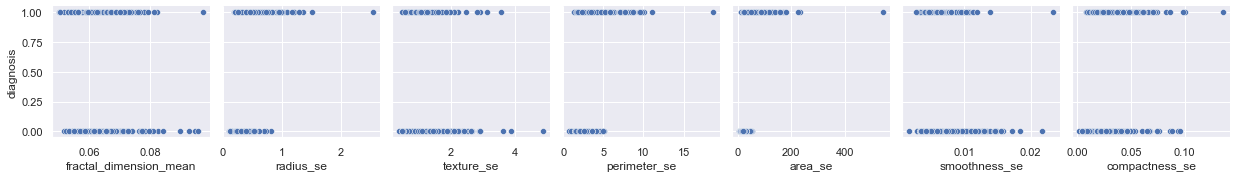

In [16]:
sns.pairplot(data,
             x_vars=[
                     'fractal_dimension_mean',
                       'radius_se', 
                     'texture_se', 
                     'perimeter_se',
                     'area_se',
                     'smoothness_se',
                    'compactness_se'],
                y_vars=["diagnosis"])

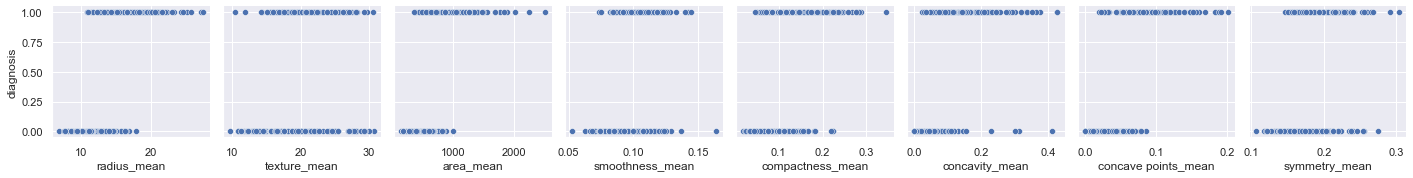

In [17]:
sns.pairplot(data,
             x_vars=['radius_mean', 
                           'texture_mean', 
                              'area_mean', 
                     'smoothness_mean',
                     'compactness_mean', 
                     'concavity_mean',
                  'concave points_mean',
                     'symmetry_mean'],
                      y_vars=["diagnosis"])

# Above graph doesn't tell much about the diagnosis

In [18]:
c={"Agg_of_all":(data["radius_mean"]+data["texture_mean"]+data["perimeter_mean"]+data["area_mean"]+data["smoothness_mean"]+data["compactness_mean"]+
                data["concavity_mean"]+data["concave points_mean"]+data["symmetry_mean"]+data["fractal_dimension_mean"]+data["radius_se"]+data["texture_se"]+
                data["perimeter_se"]+data["area_se"]+data["smoothness_se"]+data["compactness_se"]+data["concavity_se"]+data["concave points_se"]+
                data["fractal_dimension_se"]+data["symmetry_se"]+data["radius_worst"]+data["texture_worst"]+data["perimeter_worst"]+data["area_worst"]+
                data["smoothness_worst"]+data["compactness_worst"]+data["concavity_worst"]+data["concave points_worst"]+data["symmetry_worst"]+data["fractal_dimension_worst"]),"diagnosis":data["diagnosis"]}
data_1 = pd.DataFrame(data=c)

In [19]:
data_1.head()

,Agg_of_all,diagnosis
0,3566.178472,1
1,3740.923467,1
2,3387.392551,1
3,1240.001848,1
4,3336.684215,1


# Feature Engineering:Normalizing the Data

In [20]:
data_1["Agg_of_all"]=(data_1["Agg_of_all"]-data_1["Agg_of_all"].min())/(data_1["Agg_of_all"].max()-data_1["Agg_of_all"].min())

In [21]:
data_1.head()

,Agg_of_all,diagnosis
0,0.416536,1
1,0.440160,1
2,0.392366,1
3,0.102058,1
4,0.385510,1


<AxesSubplot:xlabel='Agg_of_all', ylabel='diagnosis'>

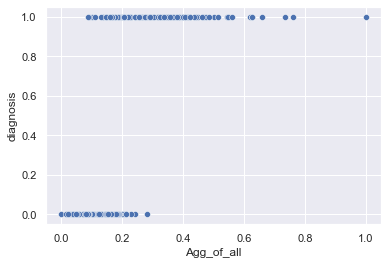

In [22]:
sns.scatterplot(data = data_1, x="Agg_of_all",y="diagnosis",legend='auto')

# So the agg_of_all above 0.2 are generally Cancer with Malignancy

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
def claculate_vif(dataset):
    vif=pd.DataFrame()
    vif_features = dataset.columns
    vif["vif_values"] = [variance_inflation_factor(dataset.values,i) for i in range (dataset.shape[1])]
    return vif

In [25]:
features = data[['radius_mean', 'texture_mean', 
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
claculate_vif(features)

,vif_values
0,7855.358058
1,248.940896
2,1462.596339
3,419.999542
4,114.735101
5,164.839627
6,165.435965
7,190.812624
8,609.430272
9,242.635074


In [26]:
X=data[['radius_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
Y=data["diagnosis"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=500)

In [28]:
#scaling data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test, classifier.predict(X_test)))

1.0


In [33]:
print(confusion_matrix(Y_test, y_pred))

[[83  0]
 [ 0 43]]


In [34]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        43

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [36]:
import pickle


In [37]:
Pkl_Filename = "Final Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(classifier, file)

In [38]:
with open('Final Model.pkl' , 'rb') as f:
    classifier = pickle.load(f)

In [39]:
Ypredict = classifier.predict(X_test)  

In [40]:
print(Ypredict)


[0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0]


In [50]:
final = pd.read_csv('Test_Set.csv')


In [51]:
Ypredict = classifier.predict(final)  

ValueError: X has 30 features per sample; expecting 29